In [7]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [8]:
from wordcloud import WordCloud
import seaborn as sns

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize

In [10]:
from string import punctuation
from nltk.corpus import stopwords
stop_nltk = stopwords.words('english')
data = pd.read_csv('imdb_sentiment.csv')
data['sentiment'].unique()

array([0, 1], dtype=int64)

In [11]:
reviews_combined = ' '.join(data['review'])

In [12]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

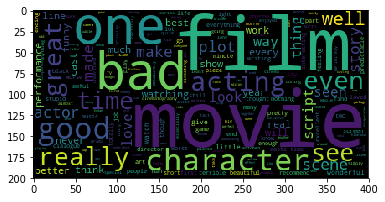

In [13]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [8]:
from nltk.stem import PorterStemmer,SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [9]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ['film','movie',"n't"]

In [10]:
def udf(text):
    token = word_tokenize(text.lower())
#     token = ' '.join(token)
#     token = wordpunct_tokenize(token)
    words = [word for word in token if word not in stop_updated and len(word)>2]
    stemm = [stemmer_s.stem(word) for word in words]
#     lemm = [lemm.lemmatize(word) for word in stemm]
    return ' '.join(stemm)

In [11]:
data['clean_review'] = data['review'].apply(udf)

In [12]:
data.head()

,review,sentiment,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,slow-mov aimless distress drift young man
1,Not sure who was more lost - the flat characte...,0,sure lost flat charact audienc near half walk
2,Attempting artiness with black & white and cle...,0,attempt arti black white clever camera angl di...
3,Very little music or anything to speak of.,0,littl music anyth speak
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo tri find song keep run head


In [43]:
word_cloud = WordCloud().generate_from_text(' '.join(data['clean_review']))


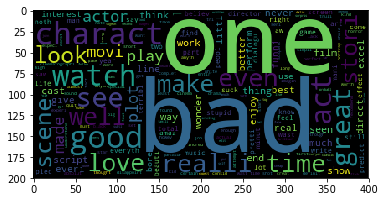

In [44]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [45]:
words = ' '.join(data['clean_review'])
words = words.split(' ')
word_dict = {}
for word in words:
    if word in word_dict:
        word_dict[word]+=1
    else:
        word_dict[word]=1    

In [46]:
series = pd.Series(word_dict)
df = pd.DataFrame(series).reset_index()
df.columns = ['words','count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

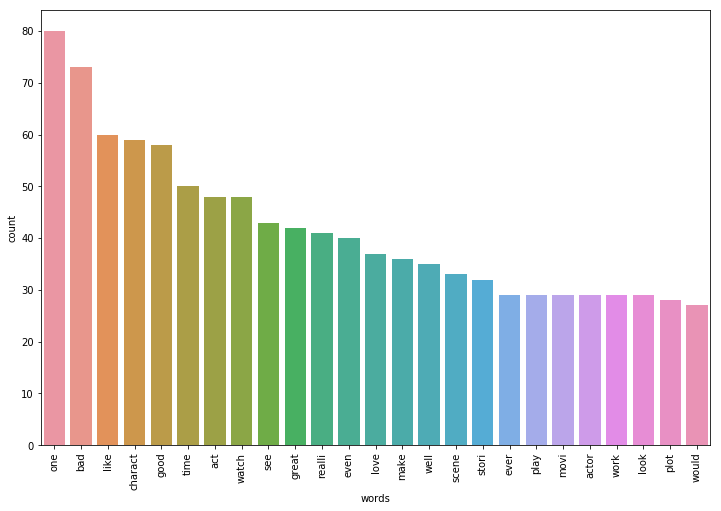

In [47]:
plt.figure(figsize=(12,8))
data = df.sort_values(by='count',ascending=False).head(25)
sns.barplot(x='words',y='count',data=data)
plt.xticks(rotation='vertical')

In [48]:
data.head()

,words,count
174,one,80
348,bad,73
237,like,60
10,charact,59
60,good,58


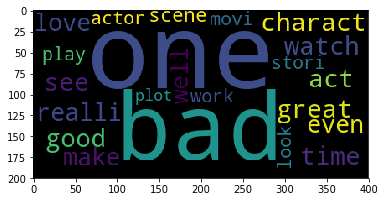

In [49]:
joining = ' '.join(data['words'])
word_cloud = WordCloud().generate_from_text(joining)
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [1]:
x = data.clean_review.values
y = data.sentiment.values

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer(max_features=2500)

In [55]:
X_train = tf_idf_vec.fit_transform(X_train)

In [56]:
tf_idf_vec.get_feature_names()

['10',
 '13',
 '15pm',
 '18th',
 '1947',
 '1948',
 '1971',
 '1973',
 '1980',
 '1986',
 '1995',
 '1998',
 '2005',
 '2006',
 '20th',
 '50',
 '70000',
 '70s',
 '8pm',
 'aailiyah',
 'abandon',
 'abil',
 'abroad',
 'absolut',
 'abysm',
 'academi',
 'accent',
 'acclaim',
 'accur',
 'accus',
 'achiev',
 'achill',
 'ackerman',
 'act',
 'action',
 'actor',
 'actress',
 'actual',
 'ad',
 'adapt',
 'addit',
 'admin',
 'admit',
 'adorable',
 'adventur',
 'advis',
 'aerial',
 'aesthet',
 'affect',
 'afraid',
 'afternoon',
 'ag',
 'age',
 'ago',
 'aimless',
 'air',
 'akasha',
 'al',
 'alert',
 'alexand',
 'alik',
 'allow',
 'almost',
 'along',
 'alreadi',
 'also',
 'although',
 'alway',
 'amaz',
 'america',
 'american',
 'among',
 'amount',
 'amus',
 'an',
 'anatomist',
 'angel',
 'angelina',
 'angl',
 'angus',
 'anim',
 'anita',
 'ann',
 'anniversari',
 'annoy',
 'anoth',
 'antithesi',
 'anyon',
 'anyth',
 'anyway',
 'apart',
 'appal',
 'appeal',
 'appear',
 'applaus',
 'appreci',
 'apt',
 'armaged

In [57]:
X_test =  tf_idf_vec.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
logreg.fit(X_train,y_train)

C:\Users\gunas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = logreg.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [62]:
accuracy_score(y_test,y_pred)

0.7422222222222222